# Title of the Project:  Algerian Forest Fire Prediction Model

Name: Erica Wilson <br>
Organization: Entri Elevate <br>
Date: 28/05/2024

### 1. Overview of the problem statement

Forest fires are a threat to environment,human lives  and property. Therefore it is important to predict their occurence in advance to take suitable preventive measures. By building a machine learning model to predict the occurence of forest fires based on certain environmental conditions, this project aims to mitigate the adverse effect of wildfires.

### 2. Objective

To build and evaluate a classification model that can accurately predict whether a fire will occur using various environmental features.

### 3. Data Dictionary

The dataset consists of 244 instances from two regions of Algeria, namely Bejaia and Sidi-Bel Abbes. There are 122 instances from each region. The variables are Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations

Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90

Ws :Wind speed in km/h: 6 to 29

Rain: total day in mm: 0 to 16.8 FWI Components

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

Drought Code (DC) index from the FWI system: 7 to 220.4

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

Buildup Index (BUI) index from the FWI system: 1.1 to 68

Fire Weather Index (FWI) Index: 0 to 31.1

Classes: two classes, namely Fire and not Fire

Region: 0 for Bejaia and 1 for Sidi-Bel Abbes

source: https://www.kaggle.com/datasets/sudhanshu432/algerian-forest-fires-cleaned-dataset

#### Import necessary modules

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 4. Importing the dataset

In [4]:
df=pd.read_csv('Algerian_forest_fires_dataset.csv')

### 5. Data Preprocessing, Cleaning and Exploratory Data Analysis

In [5]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df.tail(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
242,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [8]:
df.shape

(243, 15)

In [9]:
# To check if there are any missing values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [10]:
# To check if there are any duplicates
df.duplicated().sum()

0

There are no missing values or duplicates in the dataset.

In [11]:
# To view column names
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [12]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [13]:
# To display the minimum value, maximum value, mean, median, mode and standard deviation 

# Select numerical columns excluding 'day', 'month','year' and 'region'
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.difference(['day', 'month', 'year', 'Region'])

# Calculate minimum values for each selected numerical column
min_values = df[numerical_columns].min()

# Calculate maximum values for each selected numerical column
max_values = df[numerical_columns].max()

# To display the mean values of each numerical column
mean_values=df[numerical_columns].mean()

# To display the median values of each numerical column
median_values=df[numerical_columns].median()

# To display the mode of each numerical column
mode_values = df[numerical_columns].mode().iloc[0]  # Mode can have multiple values, take the first one

# To display the standard deviation of each numerical column
std_dev = df[numerical_columns].std()

# Combine the values into a single DataFrame to display the summary
sum_stat_df = pd.DataFrame({'Min': min_values, 'Max': max_values, 'Mean': mean_values, 'Median' :median_values, 'Mode': mode_values, 'Standard Deviation': std_dev})

# Display the combined DataFrame
print("Statistical Summary of numerical columns:")
print(sum_stat_df)


Statistical Summary of numerical columns:
              Min    Max       Mean  Median  Mode  Standard Deviation
BUI           1.1   68.0  16.690535    12.4   3.0           14.228421
DC            6.9  220.4  49.430864    33.1   8.0           47.665606
DMC           0.7   65.9  14.680658    11.3   7.9           12.393040
FFMC         28.6   96.0  77.842387    83.3  88.9           14.349641
FWI           0.0   31.1   7.035391     4.2   0.4            7.440568
ISI           0.0   19.0   4.742387     3.5   1.1            4.154234
RH           21.0   90.0  62.041152    63.0  55.0           14.828160
Rain          0.0   16.8   0.762963     0.0   0.0            2.003207
Temperature  22.0   42.0  32.152263    32.0  35.0            3.628039
Ws            6.0   29.0  15.493827    15.0  14.0            2.811385


In [14]:
# To check if the data is normally distributed, let's check the skewness of numerical variables
from scipy import stats
# Initial skewness calculation with outliers
initial_skewness = df[numerical_columns].skew()
print("Initial Skewness with outliers:")
print(initial_skewness)

Initial Skewness with outliers:
BUI            1.452745
DC             1.473460
DMC            1.522983
FFMC          -1.320130
FWI            1.147593
ISI            1.140243
RH            -0.242790
Rain           4.568630
Temperature   -0.191327
Ws             0.555586
dtype: float64


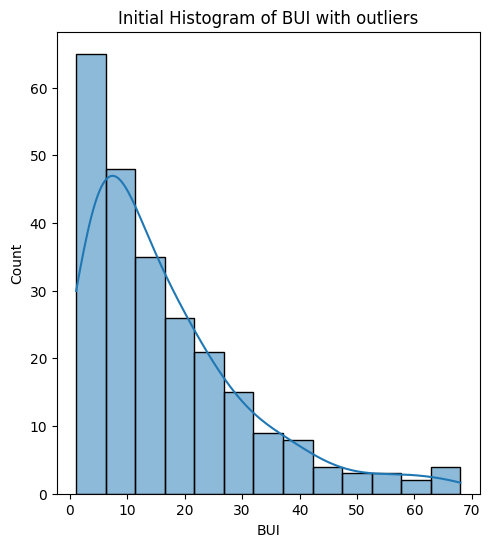

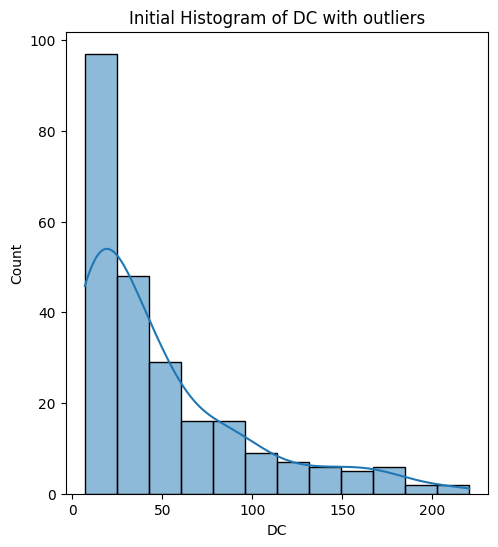

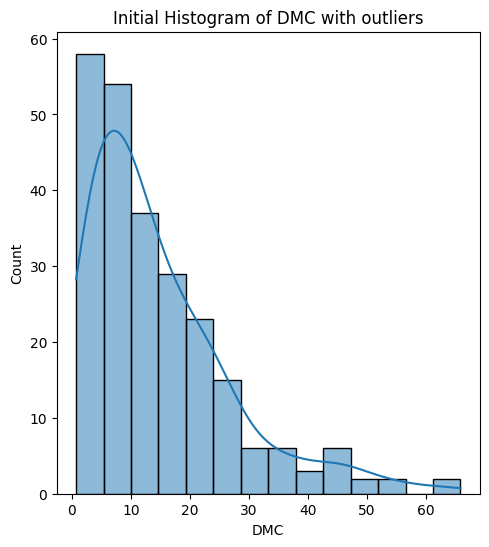

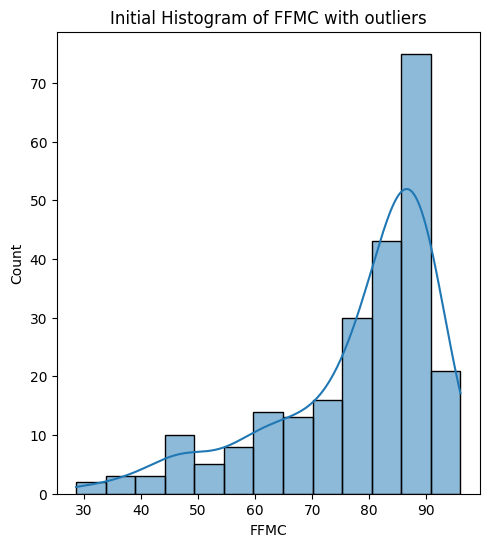

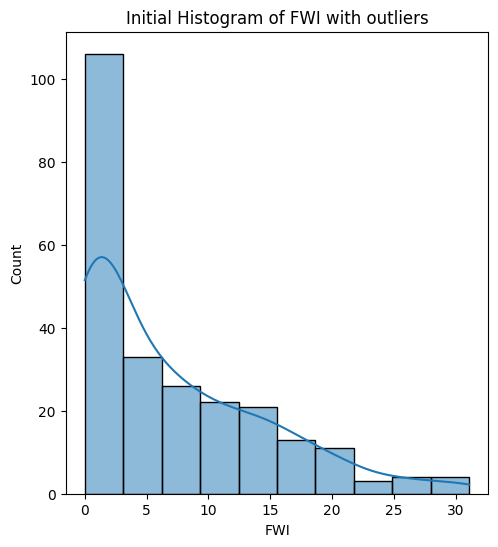

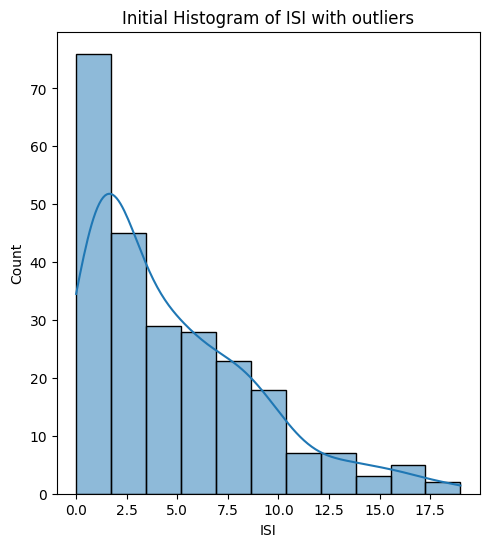

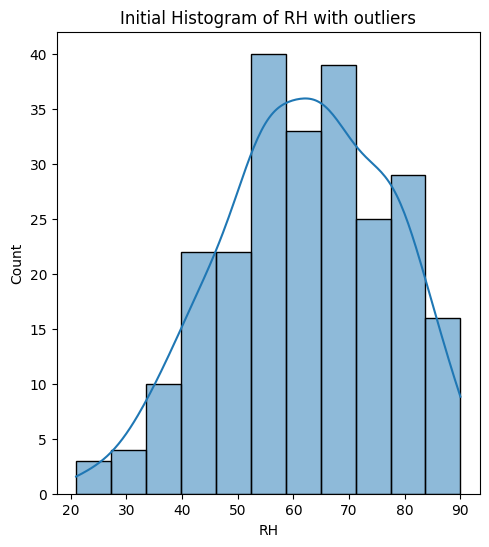

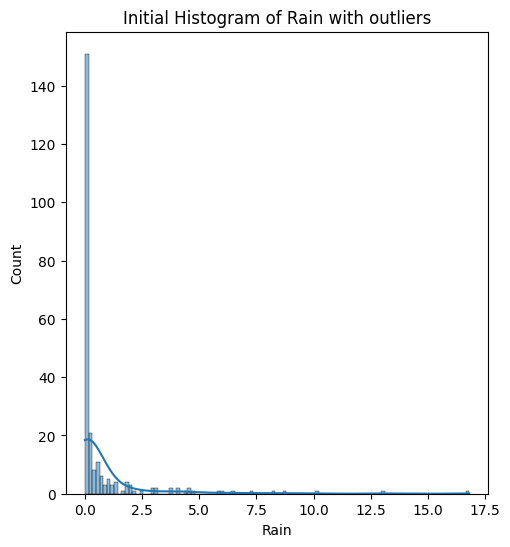

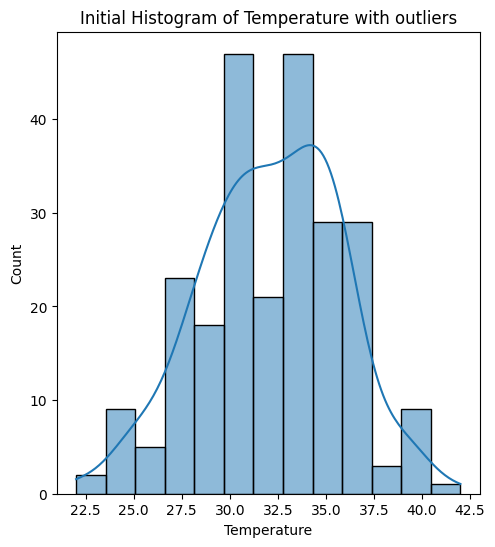

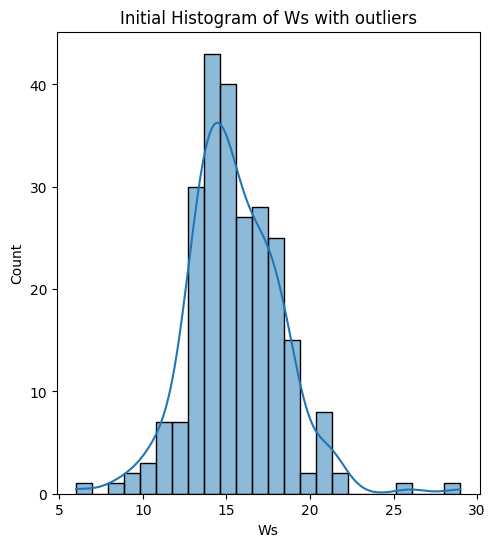

In [15]:
# Visualize initial distribution
for column in numerical_columns:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Initial Histogram of {column} with outliers')

From the above skewness values and histograms, we could infer that 'BUI', 'DC', 'DMC', 'FWI' and 'ISI'
are highly positively skewed and 'Rain' is very highly positively skewed.Therefore the next step is to remove outliers,

In [16]:

# Define the function to remove outliers using the IQR method
def remove_outliers_iqr(df, columns):
  
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers while excluding the 'region' column
cleaned_df = remove_outliers_iqr(df.copy(), numerical_columns)

# Now cleaned_df is the DataFrame with outliers removed
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", cleaned_df.shape)

Original DataFrame shape: (243, 15)
Cleaned DataFrame shape: (171, 15)


In [17]:
# Skewness calculation after removing outliers
cleaned_skewness = cleaned_df[numerical_columns].skew()
print("Skewness after removing outliers:")
print(cleaned_skewness)

Skewness after removing outliers:
BUI            0.714086
DC             1.029754
DMC            0.699917
FFMC          -1.389664
FWI            0.716060
ISI            0.770478
RH            -0.122060
Rain           2.113897
Temperature   -0.097509
Ws             0.218737
dtype: float64


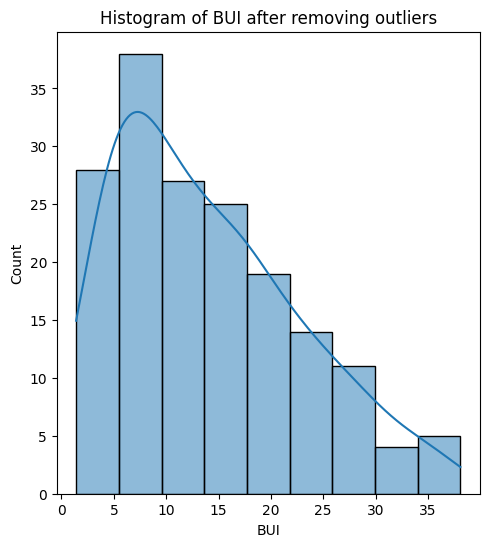

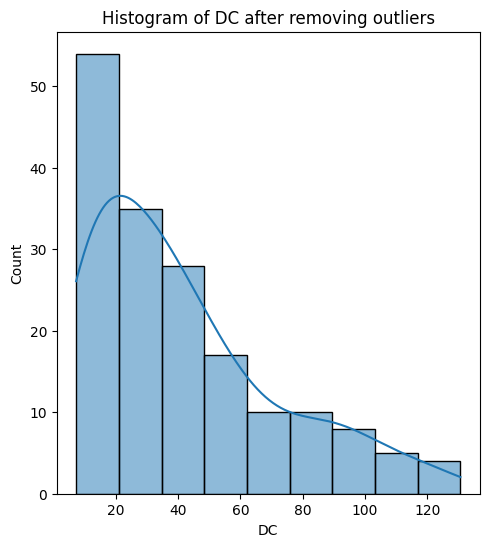

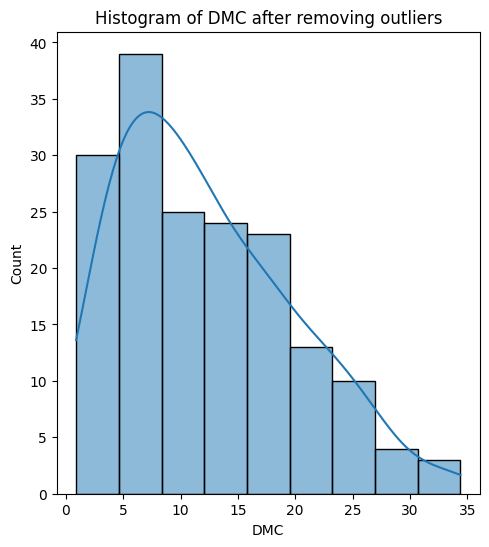

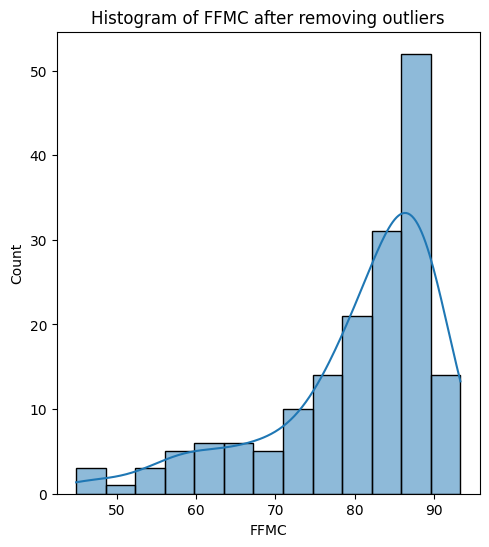

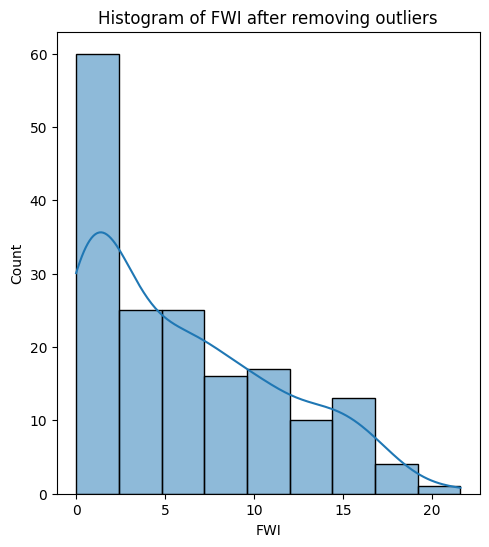

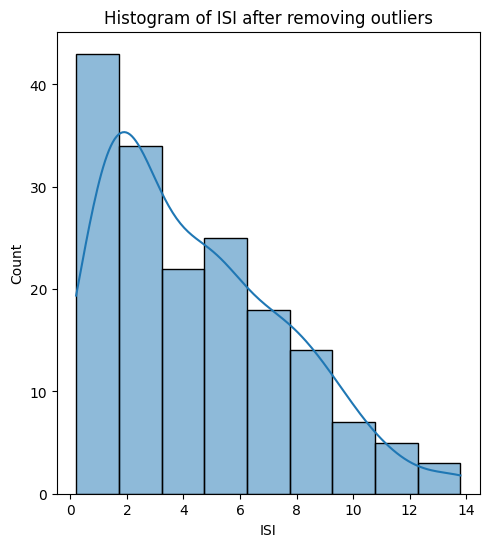

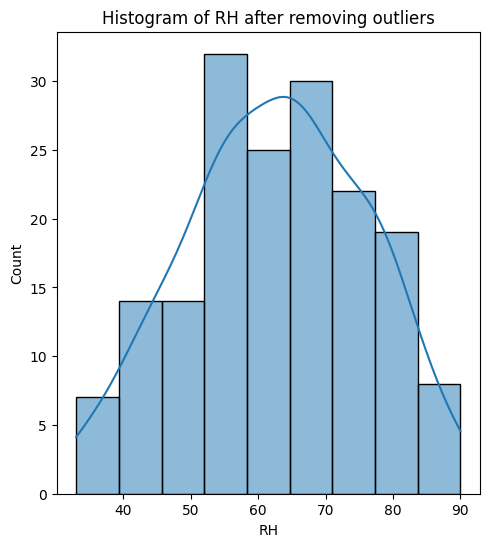

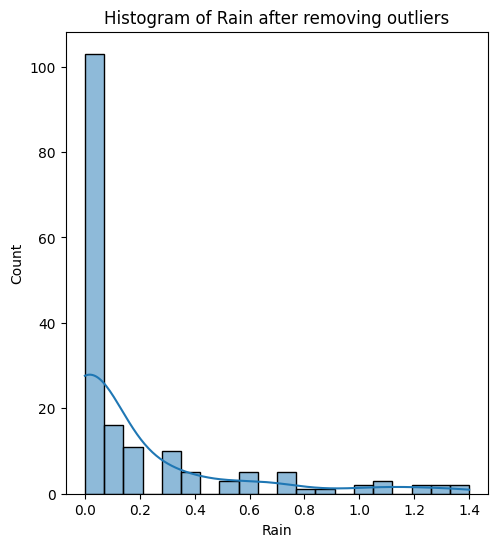

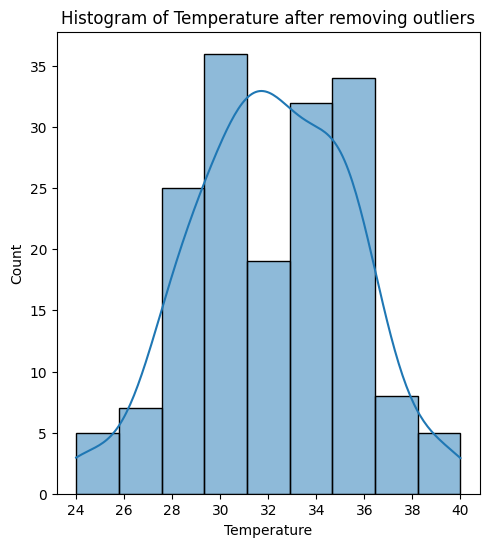

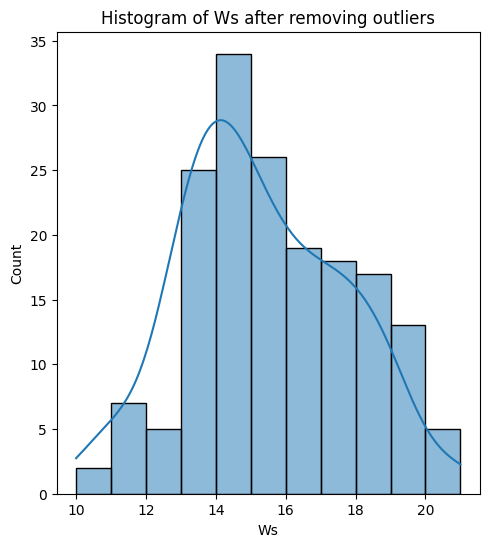

In [18]:
# Visualize distribution after removing outliers
for column in numerical_columns:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(cleaned_df[column], kde=True)
    plt.title(f'Histogram of {column} after removing outliers')

Rain has a skewness value of 2 which means highly skewed. We apply the log transformation method to reduce the right skewness.

In [19]:
# Apply log transformation to 'Rain'
cleaned_df['Rain_log'] = np.log1p(cleaned_df['Rain'])  # log1p is used to handle zero values

Text(0.5, 1.0, 'Log Transformed Rain')

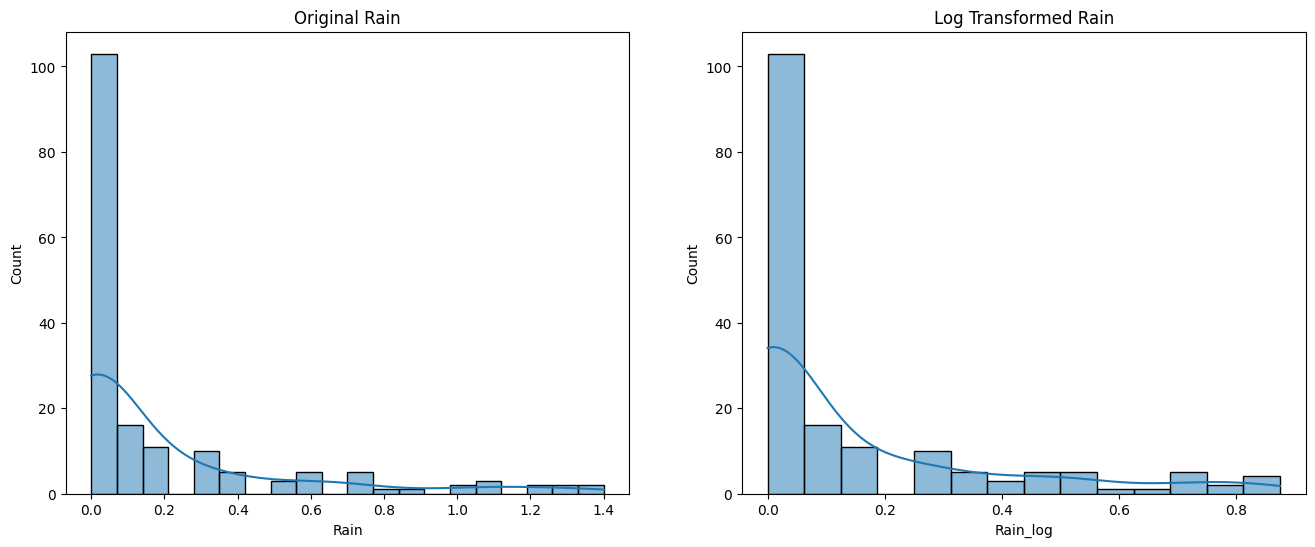

In [20]:
# Plotting histograms for original and transformed 'Rain'
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(cleaned_df['Rain'], kde=True)
plt.title('Original Rain')

plt.subplot(1, 2, 2)
sns.histplot(cleaned_df['Rain_log'], kde=True)
plt.title('Log Transformed Rain')


Since the log method is not effectively reducing the skewness of rain, let's try the box-cox method.

In [21]:
# Apply Box-Cox transformation
# Box-Cox requires positive values, so ensure there are no zero or negative values in 'Rain' column
cleaned_df['Rain'] = cleaned_df['Rain'] + 1e-6  # Adding a small value to avoid zero

# Apply Box-Cox transformation
cleaned_df['Rain_boxcox'], _ = stats.boxcox(cleaned_df['Rain'])

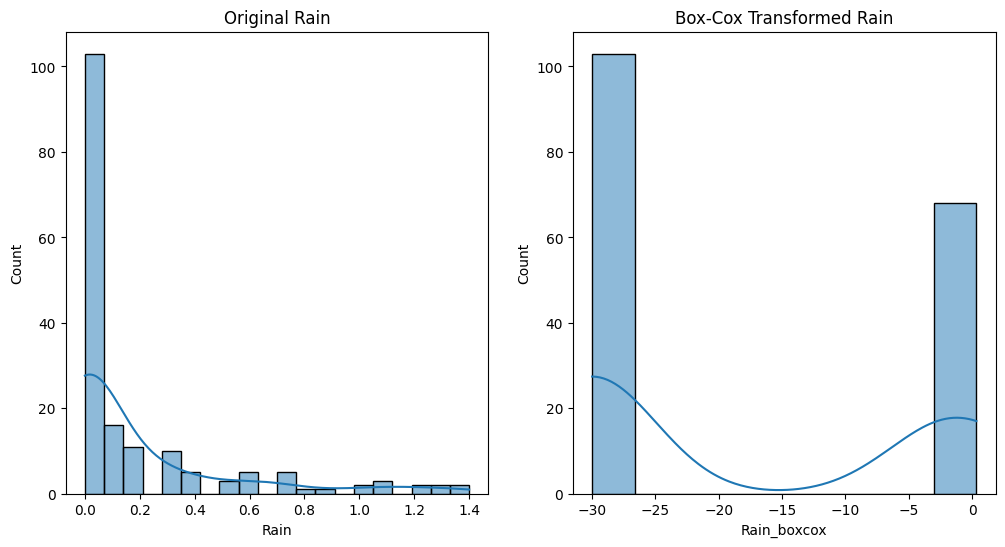

In [22]:
# Plot the histogram to see the effect of the transformation
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(cleaned_df['Rain'], kde=True)
plt.title('Original Rain')

plt.subplot(1, 2, 2)
sns.histplot(cleaned_df['Rain_boxcox'], kde=True)
plt.title('Box-Cox Transformed Rain')

plt.show()

In [23]:
# Calculate and print skewness
print("Skewness after Box-Cox transformation:", stats.skew(cleaned_df['Rain_boxcox']))


Skewness after Box-Cox transformation: 0.4239645193451062


In [24]:
# Apply Box-Cox transformation to 'DC' column

# Ensure there are no zero or negative values in 'DC' column
cleaned_df['DC'] = cleaned_df['DC'] + 1e-6  # Adding a small value to avoid zero

# Apply Box-Cox transformation to 'DC' column
cleaned_df['DC_boxcox'], _ = stats.boxcox(cleaned_df['DC'])

# Calculate the skewness of the transformed 'DC' column
skewness_dc_boxcox = cleaned_df['DC_boxcox'].skew()

# Print the new skewness value
print("Skewness of 'DC_boxcox':", skewness_dc_boxcox)

Skewness of 'DC_boxcox': -0.03289910305109772


In [25]:
from scipy.stats import boxcox

# Ensure there are no zero or negative values in 'FFMC' column
cleaned_df['FFMC'] = cleaned_df['FFMC'] + 1e-6  # Adding a small value to avoid zero

# Apply Box-Cox transformation to 'FFMC' column
cleaned_df['FFMC_boxcox'], _ = boxcox(cleaned_df['FFMC'])

# Calculate the skewness of the transformed 'FFMC' column
skewness_ffmc_boxcox = cleaned_df['FFMC_boxcox'].skew()

# Print the new skewness value
print("Skewness of 'FFMC_boxcox':", skewness_ffmc_boxcox)


Skewness of 'FFMC_boxcox': -0.35705609458447846


The box-cox transformation has reduced the skewness of' rain', 'DC' and 'FFMC' significantly to 0.42 making the data more normalized.

#### Statistical summary of the cleaned dataframe

In [26]:
# Specify the columns to be removed
column_to_remove = ['Rain_log']

# Remove the specified columns from the cleaned_df DataFrame
cleaned_df = cleaned_df.drop(columns=column_to_remove)

In [27]:
cleaned_df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Rain_boxcox,DC_boxcox,FFMC_boxcox
0,1,6,2012,29,57,18,0.000001,65.700001,3.4,7.600001,1.3,3.4,0.5,not fire,0,-29.981828,2.331900,1.364699e+09
1,2,6,2012,29,61,13,1.300001,64.400001,4.1,7.600001,1.0,3.9,0.4,not fire,0,0.258930,2.331900,1.224348e+09
4,5,6,2012,27,77,16,0.000001,64.800001,3.0,14.200001,1.2,3.9,0.5,not fire,0,-29.981828,3.188671,1.266216e+09
5,6,6,2012,31,67,14,0.000001,82.600001,5.8,22.200001,3.1,7.0,2.5,fire,0,-29.981828,3.846846,4.730257e+09
6,7,6,2012,33,54,13,0.000001,88.200001,9.9,30.500001,6.4,10.9,7.2,fire,0,-29.981828,4.339354,6.754372e+09


In [28]:
# Convert 'day', 'month', and 'year' to strings and concatenate them with a hyphen
cleaned_df['date'] = cleaned_df['year'].astype(str) + '-' + cleaned_df['month'].astype(str) + '-' + cleaned_df['day'].astype(str)

# Convert the concatenated string to a datetime object
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'], format='%Y-%m-%d')

# Drop the original 'day', 'month', and 'year' columns
cleaned_df = cleaned_df.drop(columns=['day', 'month', 'year'])

# Check the DataFrame to ensure the date column is created correctly
print(cleaned_df.head())


   Temperature  RH  Ws      Rain       FFMC  DMC         DC  ISI   BUI  FWI  \
0           29  57  18  0.000001  65.700001  3.4   7.600001  1.3   3.4  0.5   
1           29  61  13  1.300001  64.400001  4.1   7.600001  1.0   3.9  0.4   
4           27  77  16  0.000001  64.800001  3.0  14.200001  1.2   3.9  0.5   
5           31  67  14  0.000001  82.600001  5.8  22.200001  3.1   7.0  2.5   
6           33  54  13  0.000001  88.200001  9.9  30.500001  6.4  10.9  7.2   

       Classes  Region  Rain_boxcox  DC_boxcox   FFMC_boxcox       date  
0  not fire          0   -29.981828   2.331900  1.364699e+09 2012-06-01  
1  not fire          0     0.258930   2.331900  1.224348e+09 2012-06-02  
4  not fire          0   -29.981828   3.188671  1.266216e+09 2012-06-05  
5      fire          0   -29.981828   3.846846  4.730257e+09 2012-06-06  
6      fire          0   -29.981828   4.339354  6.754372e+09 2012-06-07  


In [29]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 171 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  171 non-null    int64         
 1   RH           171 non-null    int64         
 2   Ws           171 non-null    int64         
 3   Rain         171 non-null    float64       
 4   FFMC         171 non-null    float64       
 5   DMC          171 non-null    float64       
 6   DC           171 non-null    float64       
 7   ISI          171 non-null    float64       
 8   BUI          171 non-null    float64       
 9   FWI          171 non-null    float64       
 10  Classes      171 non-null    object        
 11  Region       171 non-null    int64         
 12  Rain_boxcox  171 non-null    float64       
 13  DC_boxcox    171 non-null    float64       
 14  FFMC_boxcox  171 non-null    float64       
 15  date         171 non-null    datetime64[ns]
dtypes: datetime64

#### Data Visualization

In [30]:
# Get the value counts of 'Fire' and 'No Fire' in the 'Classes' column
class_counts = cleaned_df['Classes'].value_counts()

# Print the value counts
print(class_counts)


Classes
fire            101
not fire         68
fire              1
not fire          1
Name: count, dtype: int64


It appears that there are inconsistencies in the 'Classes' column where 'fire' and 'not fire' are recorded with different capitalization or formatting. To ensure accuracy we have to standardize the values.

In [31]:
# Standardize the values in the 'Classes' column to have consistent formatting
cleaned_df['Classes'] = cleaned_df['Classes'].str.strip().str.lower() 

# Replace standardized values to a single format
cleaned_df['Classes'] = cleaned_df['Classes'].replace({'fire': 'Fire', 'not fire': 'No Fire'})

# Get the value counts of 'Fire' and 'No Fire' in the 'Classes' column
class_counts = cleaned_df['Classes'].value_counts()

# Print the value counts
print(class_counts)

Classes
Fire       102
No Fire     69
Name: count, dtype: int64


#### Value Count of Fire and No Fire Classes

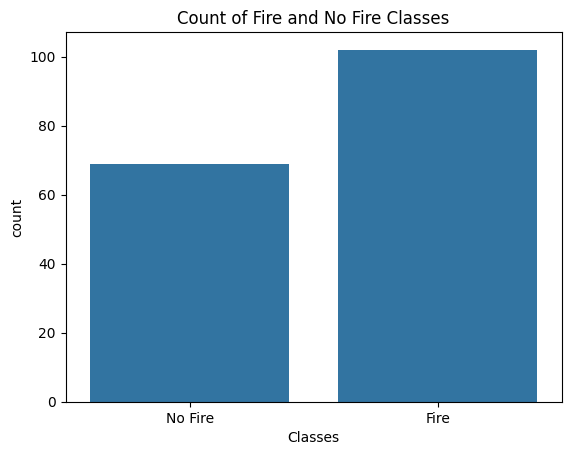

In [32]:
# Plot the value counts on a bar chart
sns.countplot(x='Classes', data=cleaned_df)
plt.title('Count of Fire and No Fire Classes')
plt.show()

#### Fire Occurence per Month

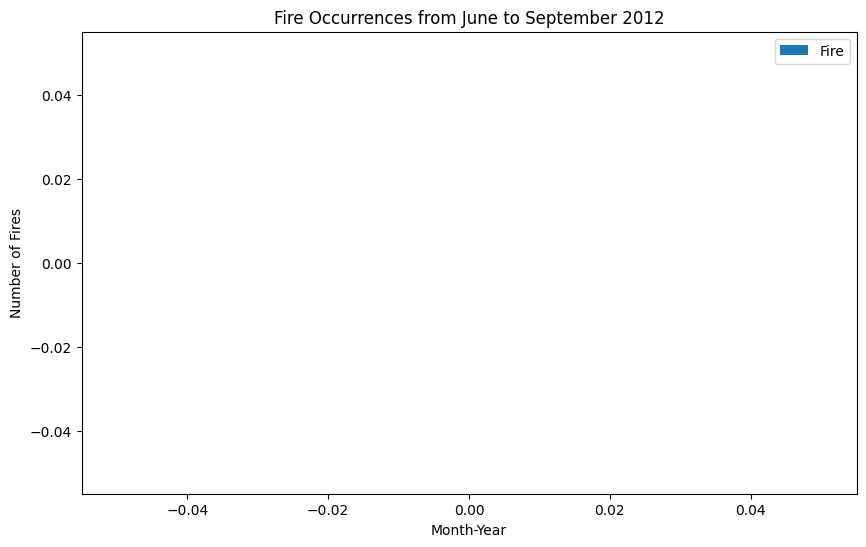

In [33]:
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'], format='%Y-%m-%d')

# Filter the data for the months June to September
cleaned_df = cleaned_df[(cleaned_df['date'].dt.month >= 6) & (cleaned_df['date'].dt.month <= 9)]

# Extract month and year for aggregation
cleaned_df['month_year'] = cleaned_df['date'].dt.to_period('M')

# Aggregate the data to count 'Fire' occurrences per month
fire_counts = cleaned_df[cleaned_df['Classes'] == 0].groupby('month_year').size()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Fire': fire_counts}).fillna(0).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(plot_data['month_year'].astype(str), plot_data['Fire'], label='Fire', alpha=0.7)
plt.xlabel('Month-Year')
plt.ylabel('Number of Fires')
plt.title('Fire Occurrences from June to September 2012')
plt.legend()
plt.show()

From the graph we can see that the highest occurence of fires were reported in July.

#### Mean Temperature by Class

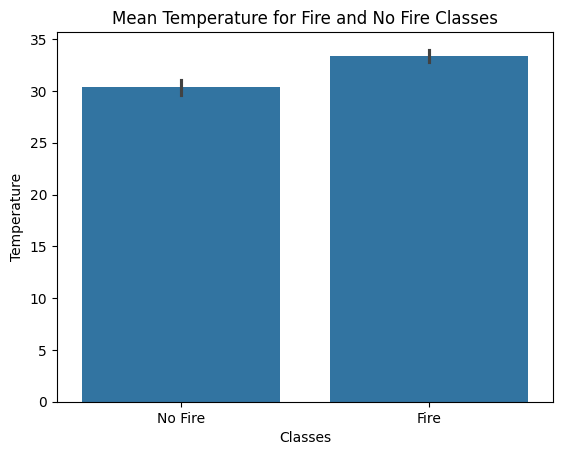

In [34]:
#Showing the mean temperature for each class

sns.barplot(x='Classes', y='Temperature', data=cleaned_df)
plt.title('Mean Temperature for Fire and No Fire Classes')
plt.show()


The bar plot shows that the mean temperature for instances classified as 'Fire' is slightly higher than for those classified as 'No Fire', indicating that higher temperatures are associated with fire occurrences. The error bars suggest that this difference is statistically significant. (The error bars show the standard error of the mean temperature for the 'Fire' and 'No Fire' classes. The non-overlapping error bars between the two groups suggest that the mean temperature difference between the 'Fire' and 'No Fire' classes is statistically significant.)

#### Distribution of Temperature by classes

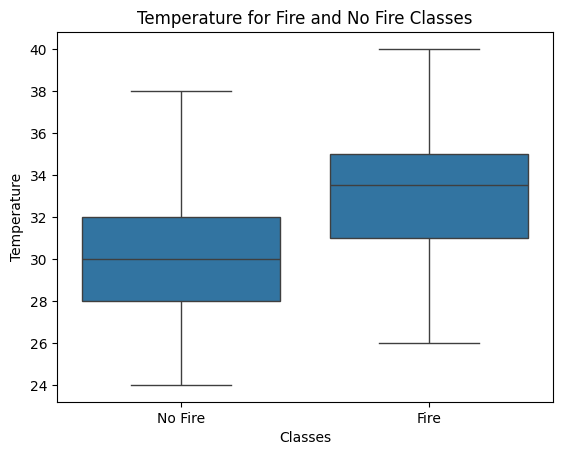

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for 'Temperature' by 'Classes'
sns.boxplot(x='Classes', y='Temperature', data=cleaned_df)
plt.title('Temperature for Fire and No Fire Classes')
plt.show()


#### Conclusions

Higher Temperatures and Fire Occurrence:

The 'Fire' class consistently shows higher temperature values, indicating that higher temperatures are associated with fire occurrences.
The median temperature for fire instances is higher than that for no-fire instances, suggesting a relationship between higher temperatures and the likelihood of fire.
Temperature Variability:

The temperature variability (spread) is greater in the 'Fire' class, which could imply that fires can occur across a wider range of higher temperatures.

#### Relative Humidity Distribution by Classes

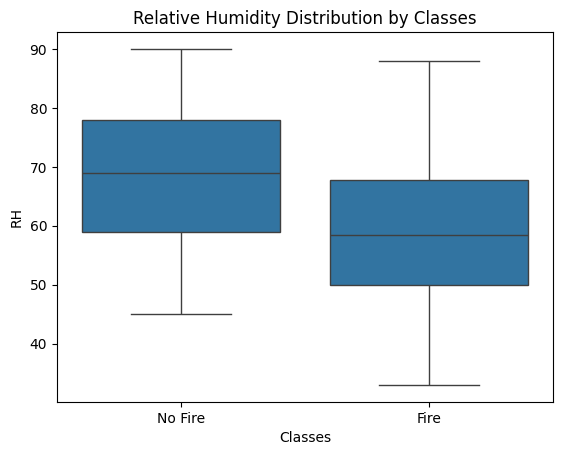

In [36]:
# Create a box plot for 'RH' by 'Classes'
sns.boxplot(x='Classes', y='RH', data=cleaned_df)
plt.title('Relative Humidity Distribution by Classes')
plt.show()


#### Conclusion
The box plot shows that the median relative humidity (RH) is lower for instances classified as 'Fire' compared to those classified as 'No Fire', suggesting that fires are associated with lower humidity levels. 

#### Distribution of Wind Speed by classes

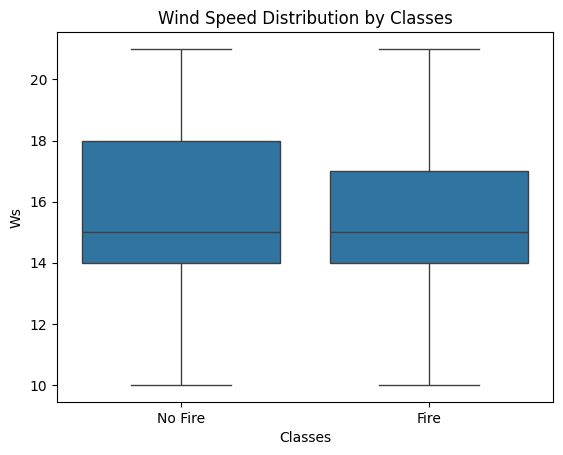

In [37]:
# Create a box plot for 'Ws' by 'Classes'
sns.boxplot(x='Classes', y='Ws', data=cleaned_df)
plt.title('Wind Speed Distribution by Classes')
plt.show()


#### Conclusion
The box plot shows that the median wind speed (Ws) is slightly higher for instances classified as 'Fire' compared to 'No Fire', suggesting that fires tend to occur with slightly higher wind speeds. 

#### Distribution of Rain (Transformed) by Classes

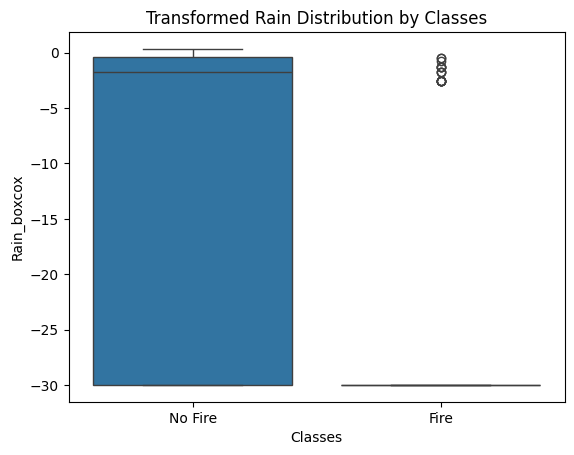

In [38]:
# Create a box plot for 'Rain_boxcox' by 'Classes'
sns.boxplot(x='Classes', y='Rain_boxcox', data=cleaned_df)
plt.title('Transformed Rain Distribution by Classes')
plt.show()


#### Conclusions
The box plot shows that the transformed rain values (Rain_boxcox) are much higher for the 'No Fire' class compared to the 'Fire' class, suggesting that higher rainfall is associated with the absence of fire. Additionally, there are several outliers in the 'Fire' class, indicating instances of fire occurring despite some rainfall

#### Relationship between various FFMC components across classes

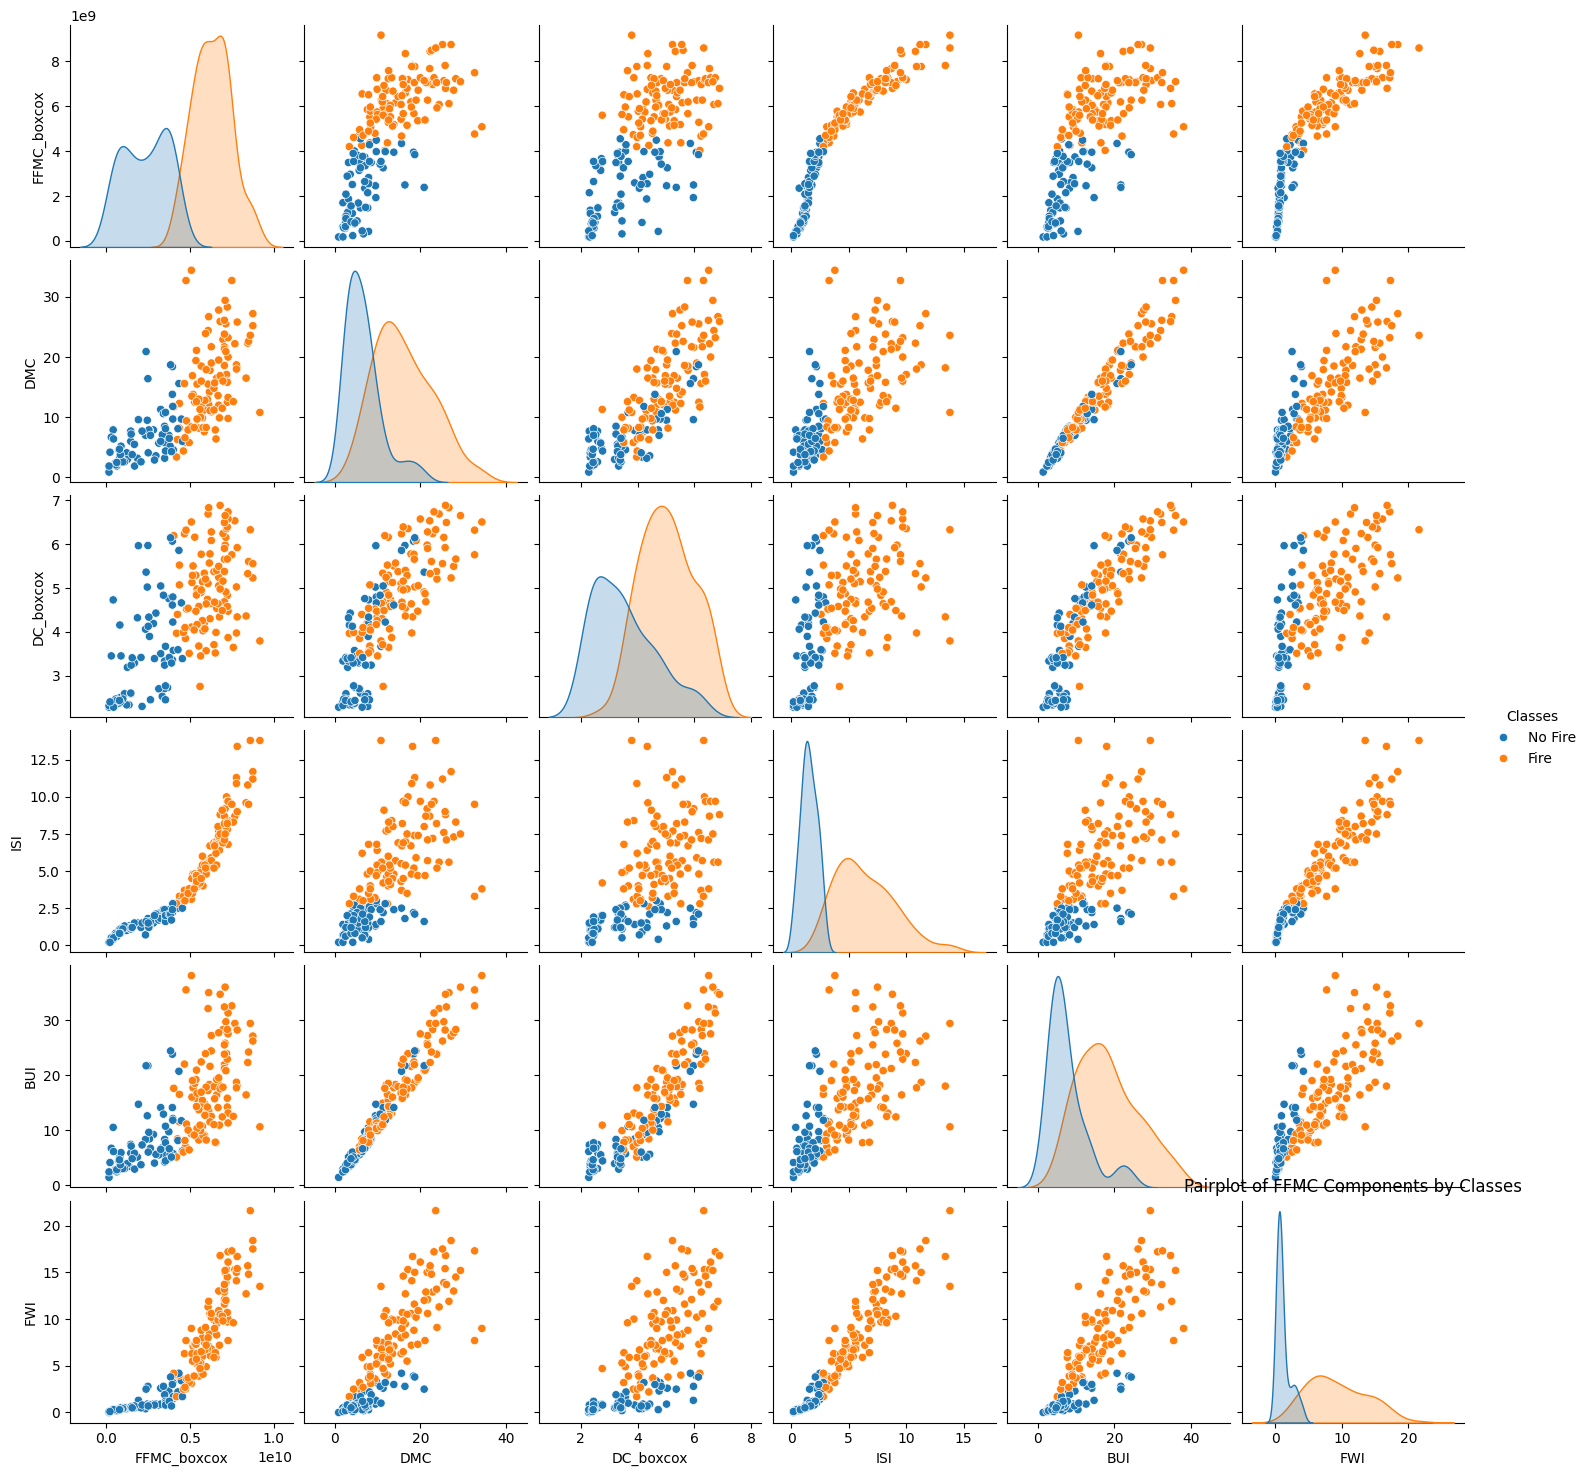

In [39]:

sns.pairplot(cleaned_df, hue='Classes', vars=['FFMC_boxcox', 'DMC', 'DC_boxcox', 'ISI', 'BUI', 'FWI'])
plt.title('Pairplot of FFMC Components by Classes')
plt.show()


#### Conclusion
The pairplot effectively highlights the relationships between various FFMC components and their distributions across 'Fire' and 'No Fire' classes. Key variables like 'FFMC_boxcox', 'DMC', and 'DC_boxcox' show clear distinctions between the classes and strong correlations with each other. 

#### Correlation Matrix

In [40]:
# Select numeric columns, excluding 'date', 'Classes', 'FFMC', 'Rain', 'DC', and 'Region'
columns_to_exclude = ['date', 'Classes', 'FFMC', 'Rain', 'DC', 'Region']

# Filter out the columns to exclude
numeric_columns = [col for col in cleaned_df.select_dtypes(include=['float64', 'int64']).columns if col not in columns_to_exclude]

# Calculate the correlation matrix
correlation_matrix = cleaned_df[numeric_columns].corr()

# Print the correlation matrix
print(correlation_matrix)

             Temperature        RH        Ws       DMC       ISI       BUI  \
Temperature     1.000000 -0.614865 -0.281118  0.519444  0.555035  0.484177   
RH             -0.614865  1.000000  0.219270 -0.369245 -0.604566 -0.314197   
Ws             -0.281118  0.219270  1.000000 -0.054956  0.023401 -0.017606   
DMC             0.519444 -0.369245 -0.054956  1.000000  0.699207  0.973263   
ISI             0.555035 -0.604566  0.023401  0.699207  1.000000  0.665100   
BUI             0.484177 -0.314197 -0.017606  0.973263  0.665100  1.000000   
FWI             0.555339 -0.528221  0.022320  0.847647  0.956046  0.833607   
Rain_boxcox    -0.123028 -0.004436  0.019617 -0.368098 -0.568743 -0.359900   
DC_boxcox       0.375821 -0.205427  0.033300  0.811727  0.579591  0.898082   
FFMC_boxcox     0.610650 -0.602694 -0.150629  0.715326  0.920765  0.683891   

                  FWI  Rain_boxcox  DC_boxcox  FFMC_boxcox  
Temperature  0.555339    -0.123028   0.375821     0.610650  
RH          -0.5282

#### Heatmap

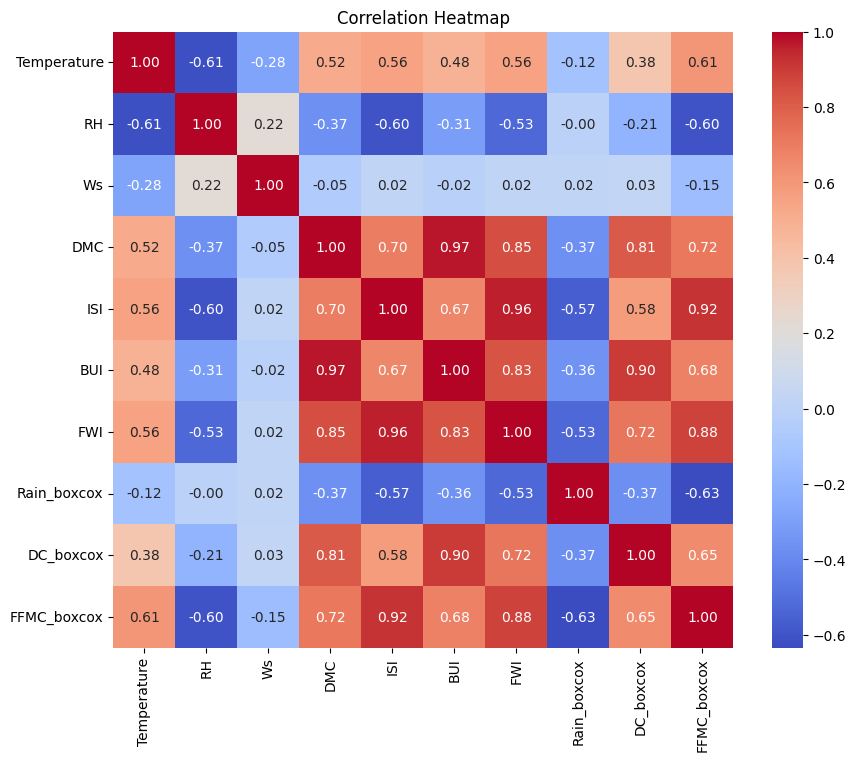

In [41]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


#### Inferences

##### Fire Weather Index (FWI):

FWI is highly correlated with ISI (0.956), DMC (0.848), and FFMC_boxcox (0.884), suggesting that these components are critical in determining the FWI. 

##### Temperature and Humidity:

There is a notable negative correlation between temperature and humidity (-0.615).

##### ISI and FFMC:

ISI and FFMC_boxcox have strong correlations with multiple variables.

### 6.Feature Engineering with Label Encoding

Since the 'Classes' column are of the objective type, we need to apply a suitable encoding method. Since 'Classes' has two categories, label encoding would be suitable.

In [42]:
print(cleaned_df['Classes'].head())


0    No Fire
1    No Fire
4    No Fire
5       Fire
6       Fire
Name: Classes, dtype: object


In [43]:
from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'Classes' column
cleaned_df['Classes'] = label_encoder.fit_transform(cleaned_df['Classes'])

# View the first few rows of the 'Classes' column
print(cleaned_df['Classes'].head())

# Check the mapping of categories to numerical values
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping)

0    1
1    1
4    1
5    0
6    0
Name: Classes, dtype: int32
{'Fire': 0, 'No Fire': 1}


As indicated, 'Fire' category is encoded as 0 and 'No Fire' as 1.

####  Separate features and target variable


In [44]:
# Before feature scaling it's important to separate feature and target variables.
# Separate features and target variable
X = cleaned_df.drop(columns=['Classes', 'date', 'Rain', 'FFMC', 'DC'])
y = cleaned_df['Classes']

# Identify numerical columns for scaling (excluding 'Region' and 'Classes')
numeric_cols = ['Temperature', 'RH', 'Ws', 'DMC', 'ISI', 'BUI', 'FWI', 'Rain_boxcox', 'DC_boxcox', 'FFMC_boxcox']

### 7. Feature Scaling using Standard Scaler

In [62]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Temperature', 'RH', 'Ws', 'Rain_boxcox', 'FFMC_boxcox', 'DMC', 'DC_boxcox', 'ISI', 'BUI', 'FWI']
X = cleaned_df[numeric_cols]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# View the first few rows of scaled data to verify scaling
print(X_scaled[:5])



[[-0.97099566 -0.4262873   1.15920332 -0.81175832 -1.46581014 -1.18057164
  -1.6901882  -1.00318691 -1.22045172 -1.03635442]
 [-0.97099566 -0.12128676 -0.97682866  1.33499681 -1.5271221  -1.08752204
  -1.6901882  -1.09824322 -1.1629847  -1.05526963]
 [-1.58369033  1.09871538  0.30479053 -0.81175832 -1.50883241 -1.23374284
  -1.00205586 -1.03487234 -1.1629847  -1.03635442]
 [-0.35830098  0.33621404 -0.54962226 -0.81175832  0.00442538 -0.86154444
  -0.47342944 -0.43284902 -0.80668915 -0.65805021]
 [ 0.2543937  -0.6550377  -0.97682866 -0.81175832  0.88865499 -0.31653965
  -0.07786209  0.61277043 -0.35844636  0.23096467]]


### 8.Handling Multicollinearity using PCA

From the correlation matrix and heatmap, we identified that some variables exhibit multicollinearity. Let's use PCA, to reduce the complexity of the dataset, address multicollinearity, and retain the most important information.

In [46]:
from sklearn.decomposition import PCA

# Initialize PCA to retain 95% of the variance
pca = PCA(n_components=0.95)

# Fit and transform the scaled data
X_pca = pca.fit_transform(X_scaled)

# Print the explained variance ratio to see how much variance each component captures
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio of each component:")
print(explained_variance_ratio)

# Optionally create a DataFrame for the principal components
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# View the first few rows of the PCA-transformed data
print("PCA-transformed data:")
print(X_pca_df.head())

# Get the PCA components (eigenvectors)
components = pca.components_

# Create a DataFrame for the components with original feature names
components_df = pd.DataFrame(components, columns=numeric_cols, index=pca_columns)

# View the principal components with original feature names
print("Principal components with original feature contributions:")
print(components_df)

Explained variance ratio of each component:
[0.59011684 0.14535426 0.09694792 0.08825673 0.03736878]
PCA-transformed data:
        PC1       PC2       PC3       PC4       PC5
0 -2.807995 -0.270905 -1.194939  1.132266  0.040583
1 -3.286001  1.338792  0.184323 -0.191210  0.816011
2 -3.104192 -1.089945 -1.130436 -0.334189  0.163923
3 -1.162684  0.151129 -1.236575 -0.598973 -0.107004
4  0.831072  0.938226 -1.304520 -0.329970  0.225287
Principal components with original feature contributions:
     Temperature        RH        Ws  Rain_boxcox  FFMC_boxcox       DMC  \
PC1     0.272530 -0.236492 -0.038465    -0.221989     0.382485  0.368120   
PC2     0.436458 -0.535579 -0.540804     0.300867     0.074808 -0.129718   
PC3     0.135237 -0.007631  0.104275     0.704635    -0.280065  0.303854   
PC4     0.053470 -0.404043  0.774719     0.236142     0.033322 -0.148022   
PC5    -0.840669 -0.404114 -0.234982     0.188258     0.044391  0.063596   

     DC_boxcox       ISI       BUI       FWI  
PC1

-The PCA transformed the original dataset into five principal components (PC1 to PC5). These components are linear combinations of the original features, and they are orthogonal (uncorrelated) to each other.

-The original dataset, with potentially correlated features, has been effectively reduced to five uncorrelated principal components. This simplification helps in addressing multicollinearity while retaining most of the important information.

-Significant Components: PC1 is the most significant component, capturing the majority of the variance. This implies that the variation in the data can be largely explained by the patterns captured by PC1.

### 9. Feature Selection with RFE

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pandas as pd
from sklearn.model_selection import train_test_split

In [48]:
# Initialize the model
model = LogisticRegression()

# Use RFE to select the top features
rfe = RFE(model, n_features_to_select=4)  # Adjust n_features_to_select as needed
fit = rfe.fit(X_pca, y)

# Print the selected features
selected_features = fit.support_
feature_ranking = fit.ranking_

# Create a DataFrame to view the results
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
rfe_results = pd.DataFrame({'Feature': pca_columns, 'Selected': selected_features, 'Ranking': feature_ranking})

print(rfe_results)

  Feature  Selected  Ranking
0     PC1      True        1
1     PC2      True        1
2     PC3      True        1
3     PC4      True        1
4     PC5     False        2


In [49]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

### 10. Model Building with Classification Methods and Evaluation

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [51]:
# Extract the selected features from the PCA-transformed data
X_train_selected = X_train[:, fit.support_]
X_test_selected = X_test[:, fit.support_]

# Verify the shape of the selected feature sets
print(X_train_selected.shape)
print(X_test_selected.shape)


(119, 4)
(52, 4)


In [52]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train_selected, y_train)
y_pred_logreg = logreg.predict(X_test_selected)

print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

Logistic Regression:
[[33  1]
 [ 1 17]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.94      0.94      0.94        18

    accuracy                           0.96        52
   macro avg       0.96      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52

Accuracy: 0.9615384615384616


##### Inference
The logistic regression model shows an accuracy of 96.15. 
Both precision and recall are high for both classes, indicating a well-performing model.
The F1-score, which balances precision and recall, is also high for both classes.

In [53]:
# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train_selected, y_train)
y_pred_dtree = dtree.predict(X_test_selected)
print("Decision Tree:")
print(confusion_matrix(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))
print("Accuracy:", accuracy_score(y_test, y_pred_dtree))


Decision Tree:
[[32  2]
 [ 5 13]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        34
           1       0.87      0.72      0.79        18

    accuracy                           0.87        52
   macro avg       0.87      0.83      0.84        52
weighted avg       0.87      0.87      0.86        52

Accuracy: 0.8653846153846154


##### Inference
The Decision Tree model achieved an accuracy of approximately 86.5%. This is slightly lower than the Logistic Regression model. 

In [54]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_selected, y_train)
y_pred_rf = rf.predict(X_test_selected)
print("Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest:
[[32  2]
 [ 3 15]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        34
           1       0.88      0.83      0.86        18

    accuracy                           0.90        52
   macro avg       0.90      0.89      0.89        52
weighted avg       0.90      0.90      0.90        52

Accuracy: 0.9038461538461539


##### Inference
The Random Forest model achieved an accuracy of approximately 92.3, greater than the Decision Tree model, but less than logistic regression.

In [55]:
# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train_selected, y_train)
y_pred_svm = svm.predict(X_test_selected)
print("Support Vector Machine (SVM):")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


Support Vector Machine (SVM):
[[33  1]
 [ 2 16]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        34
           1       0.94      0.89      0.91        18

    accuracy                           0.94        52
   macro avg       0.94      0.93      0.94        52
weighted avg       0.94      0.94      0.94        52

Accuracy: 0.9423076923076923


SVM provides 94.23 % accuracy similar to logistic regression.

### Inference

Logistic Regression achieves the highest accuracy (96.15%) and provides a balanced performance with high precision and recall for both classes. <br>

Support Vector Machine (SVM) with 94.23% accuracy, also provides balanced and reliable predictions. <br>

Other Models: Random Forest performs well with 92.31% accuracy but has slightly lower recall for the "Fire" class. Decision Tree has the lowest accuracy (86.54%) and is less reliable for predicting the "Fire" class.<br>

Logistic Regression and SVM are the top choices for this classification problem, with Logistic Regression having a slight edge due to its higher accuracy and balanced performance.

### 11. Testing with unseen Data

In [56]:
from sklearn.model_selection import GridSearchCV

# Initialize the model and RFE
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=4)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Transform the training and test sets
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Check the shapes to ensure consistency
print(X_train_selected.shape)  # Should be (number of training samples, 4)
print(y_train.shape)           # Should be (number of training samples,)
print(X_test_selected.shape)   # Should be (number of test samples, 4)
print(y_test.shape)            # Should be (number of test samples,)



(119, 4)
(119,)
(52, 4)
(52,)


In [57]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV on the selected training data
grid_search.fit(X_train_selected, y_train)



Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=2)

In [58]:
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the best model on the selected training data
best_logreg = LogisticRegression(**best_params)
best_logreg.fit(X_train_selected, y_train)



Best parameters: {'C': 0.01, 'solver': 'lbfgs'}


LogisticRegression(C=0.01)

In [59]:
# Predict on the selected test data
y_pred_best_logreg = best_logreg.predict(X_test_selected)

# Print the test set features and their corresponding predictions
print("Selected Test Set Features and Corresponding Predictions:")
for i in range(len(X_test_selected)):
    print(f"Test Features: {X_test_selected[i]} => Predicted: {y_pred_best_logreg[i]}")



Selected Test Set Features and Corresponding Predictions:
Test Features: [ 1.44962655 -1.48419234  0.88757894  1.37268583] => Predicted: 0
Test Features: [-2.13806497  0.32946347  0.11908436 -0.80267977] => Predicted: 1
Test Features: [-0.46475791 -1.24274322 -0.86696323 -0.73798232] => Predicted: 0
Test Features: [ 3.40173366 -2.0457362   1.59418434 -0.60457449] => Predicted: 0
Test Features: [-0.71681816 -1.13741865 -0.77923361 -0.15203114] => Predicted: 0
Test Features: [-3.79564494  0.29854709 -0.00529689 -0.18763637] => Predicted: 1
Test Features: [ 2.18076928 -0.32161044  0.21350537 -0.20798236] => Predicted: 0
Test Features: [-3.82407255  0.50077354  0.06945739  0.46177306] => Predicted: 1
Test Features: [-1.75670793  0.37796059  0.61542556  0.30416192] => Predicted: 1
Test Features: [-0.1526634  -1.44340047 -0.01018595  0.17418529] => Predicted: 0
Test Features: [4.04596065 1.53752683 0.32272355 1.06591529] => Predicted: 0
Test Features: [ 3.94018037  0.4614168  -0.22993924 -0.

In [60]:
# Evaluate the best model
print("Logistic Regression with Best Parameters on Test Set:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best_logreg))
print("Classification Report:")
print(classification_report(y_test, y_pred_best_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_best_logreg))

Logistic Regression with Best Parameters on Test Set:
Confusion Matrix:
[[33  1]
 [ 2 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        34
           1       0.94      0.89      0.91        18

    accuracy                           0.94        52
   macro avg       0.94      0.93      0.94        52
weighted avg       0.94      0.94      0.94        52

Accuracy: 0.9423076923076923


#### Inference

High Accuracy: The Logistic Regression model achieved a high accuracy of approximately 94.23%, indicating that it correctly predicted the occurrence of fire and no fire 94.23% of the time on the test set. <br>

Strong Precision and Recall: The model has a high precision of 0.94 for both classes, indicating that when it predicts a fire, it is usually correct. The recall for the 'No Fire' class is particularly high at 0.97, suggesting that the model is very good at identifying instances where there is no fire. The recall for the 'Fire' class is slightly lower at 0.89, indicating a few false negatives.

### 12.Interpretation of the Results

The Logistic Regression model is highly effective at distinguishing between 'Fire' and 'No Fire' scenarios.<br>

The model’s precision and recall are well-balanced, making it reliable for practical applications where both false positives and false negatives need to be minimized. <br>

With an accuracy of 94.23%, the model can be trusted for decision-making in fire prediction and prevention efforts, but attention should still be given to the slightly lower recall for the 'Fire' class to ensure critical instances are not missed.